## Loading Data from local file

Basic models with basic features to help establish a baseline to compare against other models and additional features

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./XYmat.csv')

In [3]:
df.head(5)

,name,reviews,Dungeons & Dragons,Dynamic Narration,Hacking,Otome,Benchmark,Western,Lemmings,Mystery,...,Futuristic,World War II,Match 3,Illuminati,Modern,Competitive,Hardware,Choices Matter,Violent,Artificial Intelligence
0,PLAYERUNKNOWN'S BATTLEGROUNDS,92,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,BATTLETECH,49,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,DayZ,71,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,EVE Online,61,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Theft Auto V: Premium Online Edition,74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['name', 'reviews', 'Dungeons & Dragons', 'Dynamic Narration', 'Hacking',
       'Otome', 'Benchmark', 'Western', 'Lemmings', 'Mystery',
       ...
       'Futuristic', 'World War II', 'Match 3', 'Illuminati', 'Modern',
       'Competitive', 'Hardware', 'Choices Matter', 'Violent',
       'Artificial Intelligence'],
      dtype='object', length=383)

In [5]:
df.index

RangeIndex(start=0, stop=17371, step=1)

In [6]:
df.values

array([["PLAYERUNKNOWN'S BATTLEGROUNDS", 92, 0, ..., 0, 0, 0],
       ['BATTLETECH', 49, 0, ..., 0, 0, 0],
       ['DayZ', 71, 0, ..., 0, 0, 0],
       ...,
       ['Rivals of Aether: Summit Orcane', 90, 0, ..., 0, 0, 0],
       ['Space Cat', 70, 0, ..., 0, 0, 0],
       ['White Day - Horror Costume - Ji-Min Yoo', 28, 0, ..., 0, 0, 0]],
      dtype=object)

In [7]:
y = df['reviews'].values
array = df.to_numpy()
X = array[:, 2:]
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Split train test data

In [8]:
Xtrain = X[:12160]
Xtest = X[12160:]
ytrain = y[:12160]
ytest = y[12160:]
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(12160, 381) (5211, 381) (12160,) (5211,)


## Test data with multiple linear regression

In [9]:
import scipy as sp
import scipy.sparse.linalg
import math

In [10]:
out = sp.sparse.linalg.lsqr(Xtrain,ytrain)
beta = out[0]
print(beta.shape)

(381,)


## Compute Baseline

In [11]:
yBaseline = np.ones(len(ytest)) * np.mean(ytrain)
errs = np.array(abs(ytest - yBaseline))
loss = np.sum(errs)
avgL = loss/len(ytest)
print("multiple variable loss="+"{:.2e}".format(avgL))

multiple variable loss=2.85e+01


In [12]:
## Compute loss with linear regression

In [37]:
yp = Xtest@beta

errs = np.array(abs(ytest - yp))
loss = np.sum(errs)
avgL = np.mean(avgL)

print("multiple variable loss="+"{:.2e}".format(avgL))

arr = []
for i in range(len(ytest)):
    arr.append(abs(yp[i]-ytest[i]))
arr.sort(reverse = True)
for i in range(50):
    print(arr[i])

multiple variable loss=2.65e+01
130.99634048898827
128.66156251064638
125.06142940840886
122.94246345285498
122.63651663106327
121.51388273309885
120.67156850647949
119.50534773274663
119.26814262904162
119.26661219800059
117.21157569143614
116.61953087075858
114.45483339663818
113.90057286211885
113.50754458024967
113.27324442296481
113.11231537736685
112.1373011587417
109.13619558709297
109.00884346189122
108.99679048483085
108.69725482066804
108.6122697000942
108.3795330490276
107.62941288862916
107.16482632286139
106.96739215172381
106.65375120824658
106.20236853827109
104.98744447496716
104.92534989454572
103.0563237482544
102.90149335736538
102.51318827790962
101.28805409940382
100.63840569275055
100.341700761416
99.92212350207694
97.8848044796477
97.58295612794154
97.04537603271973
96.42631357176063
96.14700932094911
95.54631960236563
95.44498339419066
95.09956929878824
94.55788191007093
94.32199069005885
94.24139809204249
92.71270101156625


In [17]:
import matplotlib.pyplot as plt



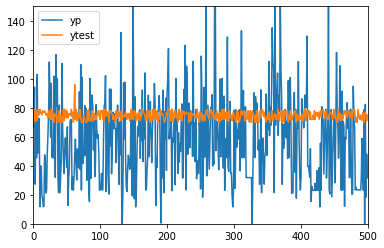

In [24]:


plt.plot(yp[:500], label = "yp")
plt.plot(ytest[:500], label = "ytest")
plt.legend(loc="upper left")
axes = plt.gca()
axes.set_xlim([0,500])
axes.set_ylim([0,150])
plt.show()

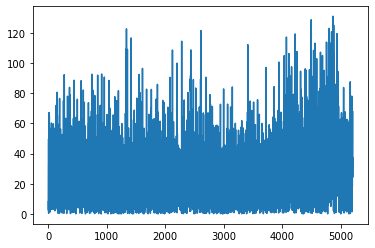

In [38]:
plt.plot(errs)

In [35]:
print(np.mean(errs))

26.47237902125061
